In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data_path = 'oxfordman_realizedvolatilityindices.csv'

data = pd.read_csv(data_path, delimiter=',')

In [4]:
vol = data['rv10'].iloc[:120000]
log_vol = np.log(vol)
log_vol

0         -8.634346
1         -8.252905
2         -7.244337
3         -8.612197
4         -8.761124
            ...    
119995   -10.345958
119996   -10.106691
119997   -10.327841
119998    -8.993027
119999   -10.267406
Name: rv10, Length: 120000, dtype: float64

In [5]:
test = log_vol.loc[log_vol.diff(periods=4)**2 > 1000]
test

Series([], Name: rv10, dtype: float64)

In [6]:
echelles_temps = range(2, 40)
q_values = list(np.linspace(0.5,3,6))  # Différentes valeurs de q

m_values = {q: [] for q in q_values}
delta_values = []

for delta in echelles_temps:
    for q in q_values:
        # Calcul de m(q, Delta) pour chaque q et Delta
        mq_delta = np.mean(np.abs(log_vol.diff(periods=delta))**q)
        m_values[q].append(mq_delta)
    
    delta_values.append(delta)

In [58]:
m_values

{0.5: [0.7036181879507265,
  0.7172995569064745,
  0.7264828139272803,
  0.7333065750246452,
  0.7439140652659665,
  0.7505531991460225,
  0.755313441137471,
  0.7597030124249797,
  0.7610561714514578,
  0.767139793285907,
  0.77251076690839,
  0.7744666746806764,
  0.7755943525695694,
  0.7768400078622015,
  0.7829937520321828,
  0.7848592773021553,
  0.7894770322155161,
  0.7889658768645617,
  0.7901050896623191,
  0.7968815191143445,
  0.8000172968287725,
  0.8015166861415713,
  0.8051688940832706,
  0.805046462839941,
  0.809609222887925,
  0.8114206158789914,
  0.8111183000034125,
  0.8121028425130609,
  0.811644666829023,
  0.8164758690684981,
  0.8172379222211122,
  0.8179265906127023,
  0.8183051942409584,
  0.8188497697312136,
  0.8209001966286524,
  0.8212664093827029,
  0.8217613999680417,
  0.8234262493372355],
 1.0: [0.5951814435404053,
  0.6196316594930255,
  0.6357496433623708,
  0.64783803467465,
  0.6662659183029129,
  0.678136992074196,
  0.6864442049878549,
  0.69408

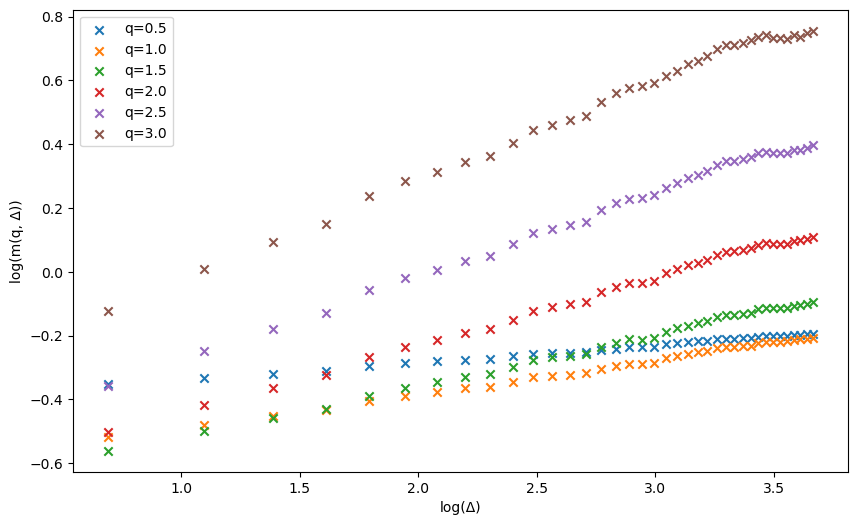

In [9]:
plt.figure(figsize=(10, 6))
for q in q_values:
    plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

plt.xlabel('log(Δ)')
plt.ylabel('log(m(q, Δ))')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


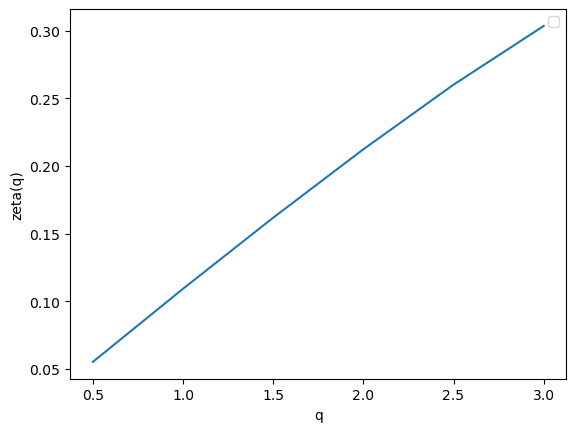

[0.055220911838700294, 0.10928096767871558, 0.16183209591332057, 0.21239507392778584, 0.2601588598464229, 0.3035811704345894]


In [10]:
log_delta = np.log(delta_values)
log_m_values = {q: np.log(m) for q, m in m_values.items()}

# Étape 1: Régression de log(m) contre log(delta) pour chaque q
slopes = []
for q in q_values:
    X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
    model = sm.OLS(log_m_values[q], X).fit()
    slopes.append(model.params[1])  # Récupérer le coefficient de pente

plt.plot(q_values, slopes)
plt.xlabel('q')
plt.ylabel('zeta(q)')
plt.legend()
plt.show()
print(slopes)

In [62]:
# Étape 2: Régression des coefficients (slopes) contre q
X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
model_h = sm.OLS(slopes, X).fit()
H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

print(f"Estimation du coefficient de Hurst, H: {H}")

print(model_h.summary())

Estimation du coefficient de Hurst, H: 0.09971416842840088
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2724.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           8.06e-07
Time:                        10:53:14   Log-Likelihood:                 25.838
No. Observations:                   6   AIC:                            -47.68
Df Residuals:                       4   BIC:                            -48.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/opt/mamba/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
